In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### ***Life_expectancy, obesity, physical activity Data*** 
This datasets contains county specific data for life expectancies, obesity and physical activity from [IHME](http://www.healthdata.org/) for multiple years
We have three excel sheets corresponding to life expectancy, physical activity and obesity.
For life expectancy, we have the actual value in years, while for physical activity and obesity we have a percentage measure which indicates prevalence.
We first load the excel file from the data folder 

In [214]:
life_data = pd.ExcelFile("Data/harsh_data/IHME_county_data_LifeExpectancy_Obesity_PhysicalActivity_NATIONAL.xlsx")

In [215]:
#Sheet names
life_data.sheet_names

['Life Expectancy', 'Physical Activity', 'Obesity']

In [217]:
#Loading all sheets into a dict of dataframes
relevant_sheets = ['Physical Activity','Obesity']

pd_dict_life = {}
for sheet in relevant_sheets:
    pd_dict_life[sheet] = pd.read_excel(life_data,sheet)

Since we have data for life expectancy, we keep only the physical activity and obesity datasets

In [218]:
pd_dict_life['Physical Activity'].head()

,State,County,"Male sufficient physical activity prevalence, 2001 (%)","Female sufficient physical activity prevalence, 2001 (%)","Male sufficient physical activity prevalence, 2009 (%)","Female sufficient physical activity prevalence, 2009 (%)","Male sufficient physical activity prevalence, 2011* (%)","Female sufficient physical activity prevalence, 2011* (%)","Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)","Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)",Unnamed: 10,*Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years
0,United States,NaN,56.8,46.7,57.8,51.3,56.3,52.6,1.0,4.7,NaN,NaN
1,Alabama,NaN,52.4,40.4,51.5,41.4,49.5,42.0,-0.9,1.0,NaN,NaN
2,Alabama,Autauga,55.0,43.6,55.1,46.8,52.9,47.5,0.1,3.2,NaN,NaN
3,Alabama,Baldwin,55.4,48.4,56.6,49.2,54.1,49.6,1.2,0.8,NaN,NaN
4,Alabama,Barbour,45.7,33.0,46.4,34.6,44.9,35.8,0.7,1.6,NaN,NaN


In [219]:
pd_dict_life['Obesity'].head()

,State,County,"Male obesity prevalence, 2001 (%)","Female obesity prevalence, 2001 (%)","Male obesity prevalence, 2009 (%)","Female obesity prevalence, 2009 (%)","Male obesity prevalence, 2011* (%)","Female obesity prevalence, 2011* (%)","Difference in male obesity prevalence, 2001-2009 (percentage points)","Difference in female obesity prevalence, 2001-2009 (percentage points)",Unnamed: 10,*Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years
0,United States,NaN,26.1,28.7,32.8,35.1,33.8,36.1,6.7,6.4,NaN,NaN
1,Alabama,NaN,29.7,34.1,36.1,41.2,37.3,42.2,6.4,7.1,NaN,NaN
2,Alabama,Autauga,30.7,32.3,35.9,37.4,37.1,38.8,5.3,5.2,NaN,NaN
3,Alabama,Baldwin,27.8,28.3,32.4,33.0,33.5,33.9,4.5,4.6,NaN,NaN
4,Alabama,Barbour,32.3,42.8,40.3,51.3,41.5,51.6,8.0,8.5,NaN,NaN


The average values for `State` are present in the rows where `County` is `NaN`. Further, we will need to remove the national average. Note that this corresponds to the row where `State` is United States. These changes have to be implemented for both physical activity and obesity so we apply it to the dict of these two dataframes

In [221]:
for sheet,df in pd_dict_life.items():
    pd_dict_life[sheet] = df[(df["County"].isnull()) & (df["State"] != "United States")].drop(columns=["County"])

We now separate the dataframes for a more detailed analysis

In [243]:
df_obesity = pd_dict_life['Obesity']
df_physical = pd_dict_life['Physical Activity']

Note that we only wish to keep the mean value of the relevant feature(here physical activity or obesity) for a specific year. Since all our other datasets have
values for years after 2010, we keep the latest values in these dataframes too.

In [244]:
df_obesity.columns

Index(['State', 'Male obesity prevalence, 2001 (%)',
       'Female obesity prevalence, 2001 (%)',
       'Male obesity prevalence, 2009 (%)',
       'Female obesity  prevalence, 2009 (%)',
       'Male obesity  prevalence, 2011* (%)',
       'Female obesity prevalence, 2011* (%)',
       'Difference in male obesity prevalence, 2001-2009 (percentage points)',
       'Difference in female obesity prevalence, 2001-2009 (percentage points)',
       'Unnamed: 10',
       '*Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years'],
      dtype='object')

In [245]:
df_physical.columns

Index(['State', 'Male sufficient physical activity prevalence, 2001 (%)',
       'Female sufficient physical activity prevalence, 2001 (%)',
       'Male sufficient physical activity  prevalence, 2009 (%)',
       'Female sufficient physical activity  prevalence, 2009 (%)',
       'Male sufficient physical activity  prevalence, 2011* (%)',
       'Female sufficient physical activity  prevalence, 2011* (%)',
       'Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)',
       'Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)',
       'Unnamed: 10',
       '*Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years'],
      dtype='object')

Note that the columns which we need to keep correspond to column indices 0,5 and 6 in each of these dataframes as these correspond to the state name and 
the corresponding feature for males and females for the year 2011.

In [246]:
df.columns[[0,5,6]]

Index(['State', 'Female obesity  prevalence, 2009 (%)',
       'Male obesity  prevalence, 2011* (%)'],
      dtype='object')

In [247]:
df_physical.columns[[0,5,6]]

Index(['State', 'Male sufficient physical activity  prevalence, 2011* (%)',
       'Female sufficient physical activity  prevalence, 2011* (%)'],
      dtype='object')

In [248]:
df_obesity = df_obesity[df_obesity.columns[[0,5,6]]]
df_physical = df_physical[df_physical.columns[[0,5,6]]]


We rename the columns for each dataframe to more usable column names

In [252]:
df_physical = df_physical.rename(columns = {"State" : "state",\
                             "Male sufficient physical activity  prevalence, 2011* (%)" : "male_physical_activity",\
                             "Female sufficient physical activity  prevalence, 2011* (%)" : "female_physical_activity"})
df_physical.head()

,state,male_physical_activity,female_physical_activity
1,Alabama,49.5,42.0
69,Alaska,59.8,57.6
98,Arizona,59.5,56.9
114,Arkansas,51.3,45.2
190,California,61.3,59.2


In [253]:
df_obesity.rename(columns = {"State" : "state",\
                             "Male obesity  prevalence, 2011* (%)" : "male_obesity",\
                             "Female obesity prevalence, 2011* (%)" : "female_obesity"},inplace=True)
df_obesity.head()

,state,male_obesity,female_obesity
1,Alabama,37.3,42.2
69,Alaska,33.8,37.6
98,Arizona,32.4,33.8
114,Arkansas,37.2,39.3
190,California,29.4,32.9


We will now try to analyse the distributions of our dataframes 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a543450f0>,
      dtype=object)

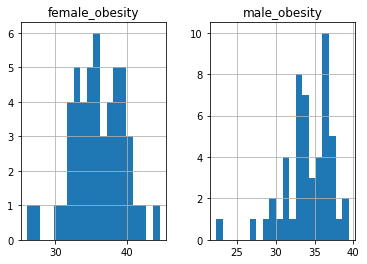

In [97]:
df_obesity.hist(bins = 20)

In [233]:
df_obesity.describe()

,male_obesity,female_obesity
count,51.000000,51.000000
mean,34.023529,35.929412
std,3.173994,3.635893
min,22.400000,26.100000
25%,32.700000,33.450000
50%,33.900000,35.900000
75%,36.300000,38.750000
max,39.400000,44.500000


From the histograms, we can see that the distributions for female obesity is almost gaussian while it is skewed to the left for the males.
The obesity prevalence is also comparatively higher for all females. The District of Columbia has the lowest male obesity while Hawaii has the lowest female 
obesity which is lower than its male obesity. Mississipi has half of its females obese and Louisiana tops in Male obesity. Note that the least obese states are actually much less obese than other states(around 3 standard deviations from 25 percentile). 

In [256]:
#Max male obesity
df_obesity.loc[df_obesity["male_obesity"].idxmax()]

state             Louisiana
male_obesity           39.4
female_obesity         41.7
Name: 1131, dtype: object

In [257]:
#Max female obesity
df_obesity.loc[df_obesity["female_obesity"].idxmax()]

state             Mississippi
male_obesity             39.1
female_obesity           44.5
Name: 1425, dtype: object

In [258]:
#Min male obesity
df_obesity.loc[df_obesity["male_obesity"].idxmin()]

state             District of Columbia
male_obesity                      22.4
female_obesity                    35.3
Name: 327, dtype: object

In [260]:
#Min female obesity
df_obesity.loc[df_obesity["female_obesity"].idxmin()]

state             Hawaii
male_obesity        28.4
female_obesity      26.1
Name: 557, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a541c6438>,
      dtype=object)

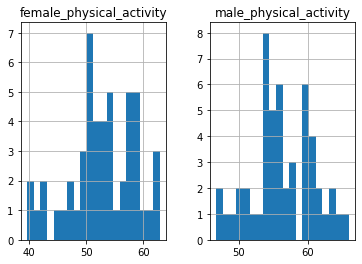

In [101]:
df_physical.hist(bins = 20)

In [261]:
df_physical.describe()

,male_physical_activity,female_physical_activity
count,51.000000,51.000000
mean,56.249020,52.794118
std,4.547191,5.802600
min,46.700000,39.700000
25%,53.700000,49.900000
50%,55.800000,52.800000
75%,59.800000,57.650000
max,66.000000,62.800000


The distributions we now get are mean centered but not
particularly gaussian. Female physical activity is comparatively lower than male physical activity(mean and median). 

In [262]:
#Max male physical activity
df_physical.loc[df_physical["male_physical_activity"].idxmax()]

state                       Hawaii
male_physical_activity          66
female_physical_activity      60.9
Name: 557, dtype: object

In [263]:
#Max female physical activity
df_physical.loc[df_physical["female_physical_activity"].idxmax()]

state                       Vermont
male_physical_activity         63.7
female_physical_activity       62.8
Name: 2851, dtype: object

In [264]:
#Min male physical activity
df_physical.loc[df_physical["male_physical_activity"].idxmin()]

state                       Tennessee
male_physical_activity           46.7
female_physical_activity         39.9
Name: 2470, dtype: object

In [280]:
#Min female physical activity
df_physical.loc[df_physical["female_physical_activity"].idxmin()]

state                       Mississippi
male_physical_activity             47.2
female_physical_activity           39.7
Name: 1425, dtype: object

Hawaii has the highest physical activity for males and really high physical activity for females too. Their low obesity and high physical activity indicate the correlation for these two features. Further, Mississippi's low physical activity levels and high obesity rates again indicate the correlation.

In [291]:
#df_physical_mean = df_physical.copy()
#df_obesity_mean = df_obesity.copy()
df_physical["mean_physical_activity"] = 0.5*(df_physical["male_physical_activity"] + df_physical["male_physical_activity"]) 
df_obesity["mean_obesity"] = 0.5*(df_obesity["male_obesity"] + df_obesity["female_obesity"])

/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [295]:
df_physical.describe()

,male_physical_activity,female_physical_activity,mean_physical_activity
count,51.000000,51.000000,51.000000
mean,56.249020,52.794118,56.249020
std,4.547191,5.802600,4.547191
min,46.700000,39.700000,46.700000
25%,53.700000,49.900000,53.700000
50%,55.800000,52.800000,55.800000
75%,59.800000,57.650000,59.800000
max,66.000000,62.800000,66.000000


In [279]:
df_physical_mean.head()

,state,male_physical_activity,female_physical_activity
1,Alabama,49.5,42.0
69,Alaska,59.8,57.6
98,Arizona,59.5,56.9
114,Arkansas,51.3,45.2
190,California,61.3,59.2


In [110]:
alcohol_data_xls = pd.ExcelFile("Data/harsh_data/IHME_county_data_Alcohol_NATIONAL.xlsx")

In [124]:
alcohol_df = pd.read_excel(alcohol_data_xls,'Any')

In [114]:
alcohol_df.columns

Index(['State', 'Location', '2002 Both Sexes', '2002 Females', '2002 Males',
       '2003 Both Sexes', '2003 Females', '2003 Males', '2004 Both Sexes',
       '2004 Females', '2004 Males', '2005 Both Sexes', '2005 Females',
       '2005 Males', '2006 Both Sexes', '2006 Females', '2006 Males',
       '2007 Both Sexes', '2007 Females', '2007 Males', '2008 Both Sexes',
       '2008 Females', '2008 Males', '2009 Both Sexes', '2009 Females',
       '2009 Males', '2010 Both Sexes', '2010 Females', '2010 Males',
       '2011 Both Sexes', '2011 Females', '2011 Males', '2012 Both Sexes',
       '2012 Females', '2012 Males', 'Percent Change 2002-2012, Both Sexes',
       'Percent Change 2002-2012, Females', 'Percent Change 2002-2012, Males',
       'Percent Change 2005-2012, Both Sexes',
       'Percent Change 2005-2012, Females', 'Percent Change 2005-2012, Males'],
      dtype='object')

In [132]:
alcohol_df = alcohol_df[(alcohol_df["Location"] == alcohol_df["State"]) & (alcohol_df["Location"] != "United States")].drop(columns=["Location"])

In [138]:
alcohol_df = alcohol_df[["State","2012 Both Sexes"]].rename(columns = {"2012 Both Sexes" : "alcohol_prevalence"})
alcohol_df.head()

,State,alcohol_prevalence
1,Alabama,43.6
69,Alaska,59.5
94,Arizona,55.8
109,Arkansas,43.7
190,California,56.5


In [139]:
alcohol_df.describe()

,alcohol_prevalence
count,51.000000
mean,55.966667
std,8.725701
min,28.200000
25%,50.850000
50%,58.100000
75%,62.300000
max,68.400000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a5088cba8>]],
      dtype=object)

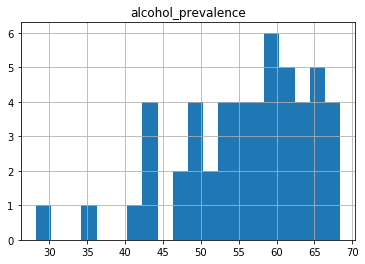

In [140]:
alcohol_df.hist(bins = 20)

In [153]:
diabetes_data_xls = pd.ExcelFile("Data/harsh_data/IHME_county_data_Diabetes_NATIONAL.xlsx")

In [187]:
diabetes_df = pd.read_excel(diabetes_data_xls,'Total')

In [188]:
diabetes_df.columns = diabetes_df.iloc[0]

In [189]:
diabetes_df = diabetes_df.drop(diabetes_df.index[0])

In [190]:
diabetes_df = diabetes_df[(diabetes_df["FIPS"].notnull()) & (diabetes_df["FIPS"]< 100)]

In [192]:
diabetes_df = diabetes_df[["Location","Prevalence, 2012, Both Sexes"]].rename(columns = {"Location":"State","Prevalence, 2012, Both Sexes" : "diabetes_prevalence"})

In [193]:
diabetes_df.head()

,State,diabetes_prevalence
2,Alabama,16.19
70,Alaska,11.89
100,Arizona,13.72
116,Arkansas,15.23
192,California,14.51


In [207]:
diabetes_df = diabetes_df.astype({"diabetes_prevalence" : "float64"})

In [208]:
diabetes_df.describe()

,diabetes_prevalence
count,51.000000
mean,13.703529
std,1.578180
min,10.740000
25%,12.420000
50%,13.770000
75%,14.930000
max,17.550000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a46dc9898>]],
      dtype=object)

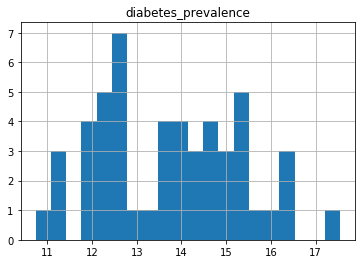

In [211]:
diabetes_df.hist(bins=20)

In [237]:
merged_df1 = pd.merge(diabetes_df,alcohol_df,on="State")

In [238]:
merged_df1.head()

,State,diabetes_prevalence,alcohol_prevalence
0,Alabama,16.19,43.6
1,Alaska,11.89,59.5
2,Arizona,13.72,55.8
3,Arkansas,15.23,43.7
4,California,14.51,56.5


In [301]:
merged_df2 = pd.merge(df_physical[["state","mean_physical_activity"]],df_obesity[["state","mean_obesity"]], on="state")

In [302]:
merged_df2.head()

,state,mean_physical_activity,mean_obesity
0,Alabama,49.5,39.75
1,Alaska,59.8,35.70
2,Arizona,59.5,33.10
3,Arkansas,51.3,38.25
4,California,61.3,31.15


In [303]:
merged_df2 = merged_df2.rename(columns = {"state":"State"})

In [304]:
merged_df2.head()

,State,mean_physical_activity,mean_obesity
0,Alabama,49.5,39.75
1,Alaska,59.8,35.70
2,Arizona,59.5,33.10
3,Arkansas,51.3,38.25
4,California,61.3,31.15


In [305]:
merged_df = pd.merge(merged_df1,merged_df2,on="State")

In [306]:
merged_df.corr()

,diabetes_prevalence,alcohol_prevalence,mean_physical_activity,mean_obesity
diabetes_prevalence,1.000000,-0.627450,-0.719537,0.712363
alcohol_prevalence,-0.627450,1.000000,0.522726,-0.482867
mean_physical_activity,-0.719537,0.522726,1.000000,-0.840775
mean_obesity,0.712363,-0.482867,-0.840775,1.000000


In [307]:
merged_df.to_pickle("hv_data.pkl")